In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_csv('Downloads/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [27]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

In [13]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [14]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.334760,-0.773102,0.588614,0.578933
condition,0.334760,1.000000,-0.314205,0.276521,0.317712
odometer,-0.773102,-0.314205,1.000000,-0.582654,-0.577397
mmr,0.588614,0.276521,-0.582654,1.000000,0.983493
sellingprice,0.578933,0.317712,-0.577397,0.983493,1.000000


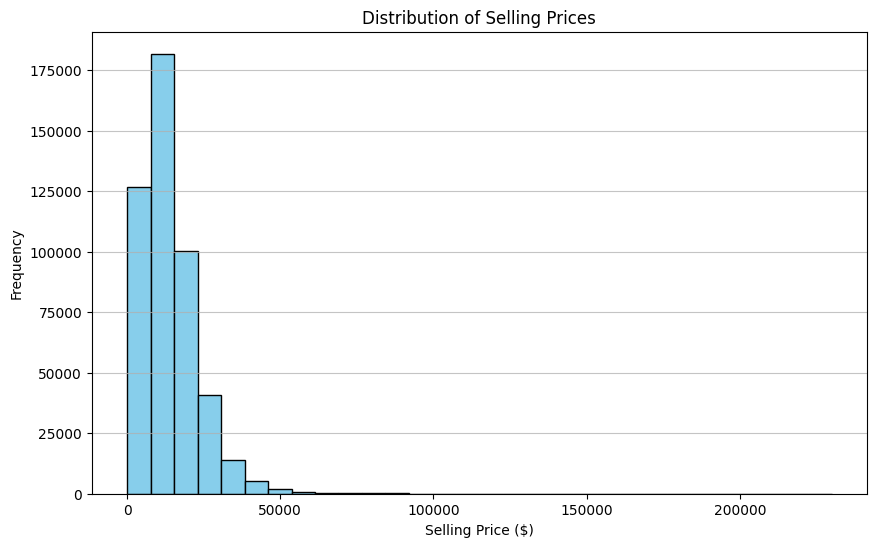

In [18]:
# Function to plot histogram of selling prices
def plot_selling_price_histogram(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data['sellingprice'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Selling Prices')
    plt.xlabel('Selling Price ($)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('selling_price_histogram.png')
    plt.show()
plot_selling_price_histogram(df)

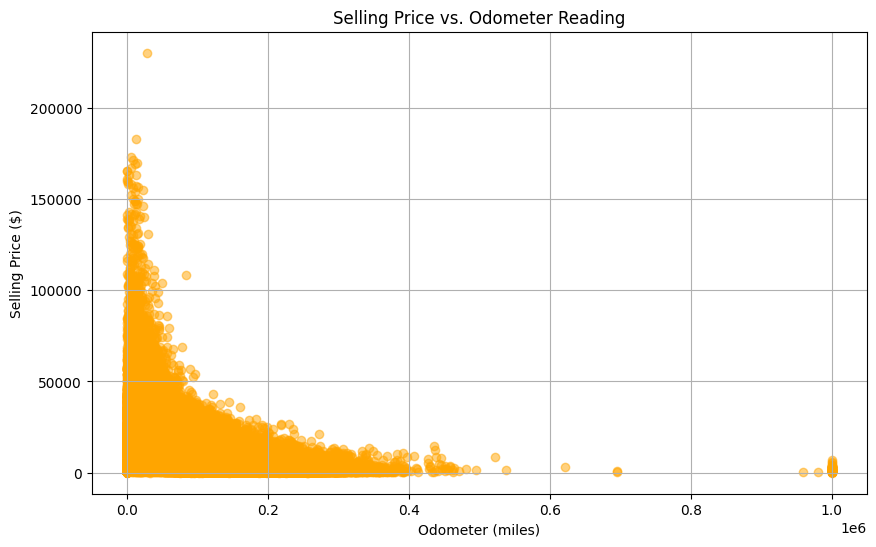

In [19]:
# Function to plot scatter plot of selling price vs. odometer
def plot_selling_price_vs_odometer(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['odometer'], data['sellingprice'], alpha=0.5, color='orange')
    plt.title('Selling Price vs. Odometer Reading')
    plt.xlabel('Odometer (miles)')
    plt.ylabel('Selling Price ($)')
    plt.grid()
    plt.savefig('selling_price_vs_odometer.png')
    plt.show()
plot_selling_price_vs_odometer(df)

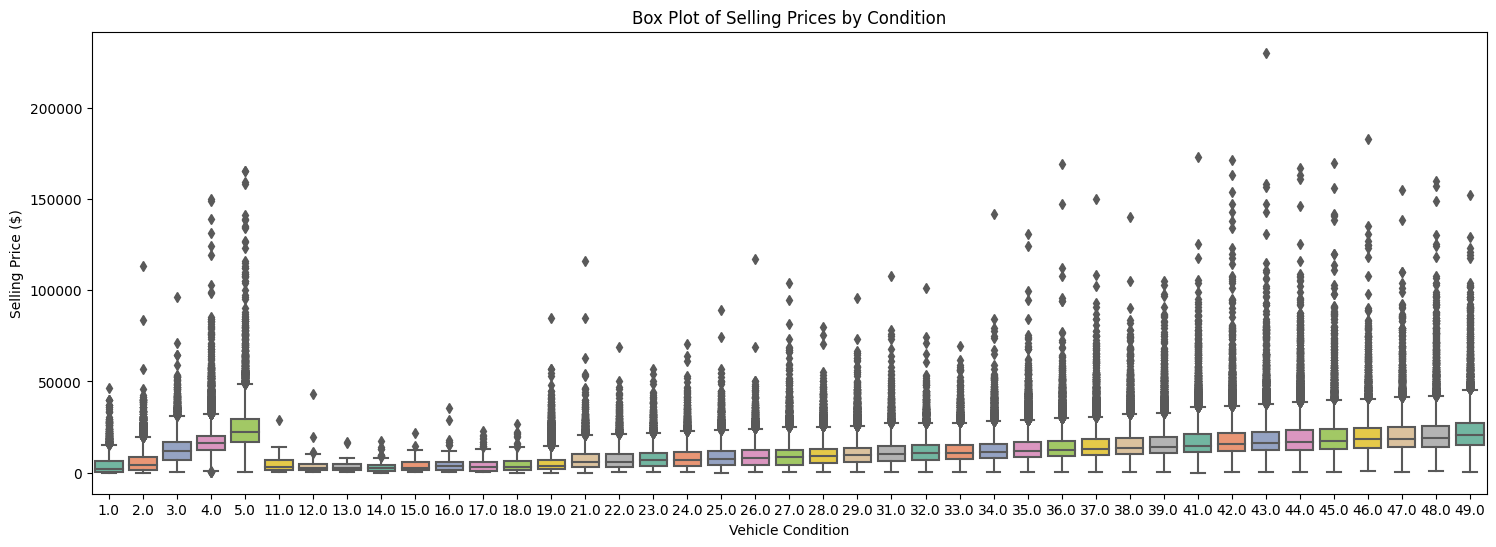

In [25]:
# Function to plot box plot of selling prices by vehicle condition
def plot_boxplot_selling_price_by_condition(data):
    plt.figure(figsize=(18, 6))
    sns.boxplot(x='condition', y='sellingprice', data=data, palette='Set2')  # Changed to 'Set2' palette
    plt.title('Box Plot of Selling Prices by Condition')
    plt.xlabel('Vehicle Condition')
    plt.ylabel('Selling Price ($)')
    plt.savefig('boxplot_selling_price_by_condition.png')
    plt.show()
plot_boxplot_selling_price_by_condition(df)